<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-jorgefdzlara/blob/main/Regresion_lineal_polinomial_A01793062.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nombre del alumno:** Jorge Fernández Lara

**Matrícula:** A01793062


### **Ejercicio 1.** Costo en la industria de manufactura. Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.

1. Divide los datos del costo de manufactura. 
2. Utiliza la función train_test_split (viene el ejemplo al final del notebook).
**Regresión Lineal.**
* Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

**Regresión Polinomial.**

* Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.
* Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.
3. Finalmente grafica :
* MAE (de los cuatro métodos)
* R2 (de los cuatro métodos)
4. Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,  make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, train_test_split, RepeatedKFold, cross_validate

In [ ]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [ ]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

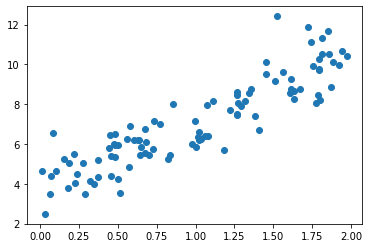

In [ ]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [ ]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [ ]:
#X_fit[]

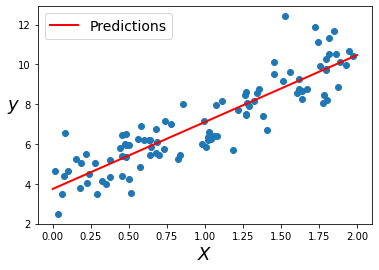

In [ ]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [ ]:
X_new = np.array([[0], [2]])

X_new

array([[0],
       [2]])

In [ ]:
X_new.shape


(2, 1)

In [ ]:
y_new = linear_reg.predict(X_new)

y_new

array([[ 3.74406122],
       [10.47517611]])

In [ ]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [ ]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [ ]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3

y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

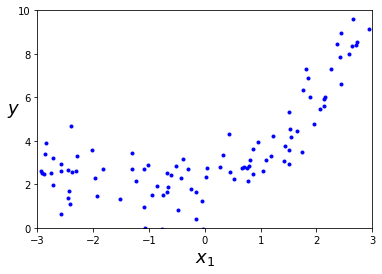

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [ ]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [ ]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [ ]:
X_poly[0]


array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [ ]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

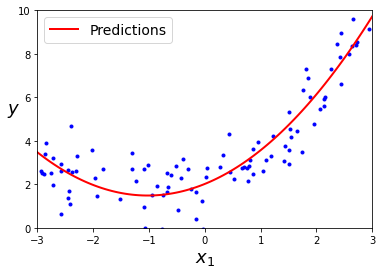

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [ ]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [ ]:
len(X)

1000

In [ ]:

y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

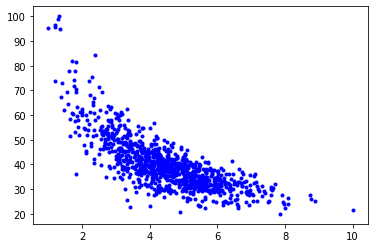

In [ ]:
plt.plot(X,y,'b.')

### **Regresión Lineal**

1. Divide los datos del costo de manufactura. 
2. Utiliza la función train_test_split (viene el ejemplo al final del notebook).


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [ ]:
val_mae =[] 
val_r2 =[]

**Regresión Lineal.**
* Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.



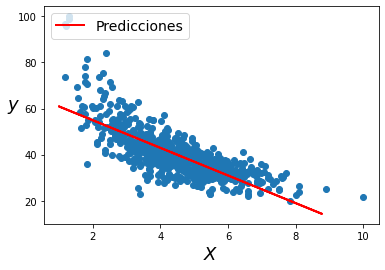

In [ ]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)
X_val_regre = X_test
y_val_regre = linear_reg.predict(X_val_regre)

plt.scatter(X_train, y_train)
plt.plot(X_val_regre, y_val_regre, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [ ]:
linear_reg.coef_, linear_reg.intercept_
mae_lineal_sim = metrics.mean_absolute_error(y_test,y_val_regre)
val_mae.append(mae_lineal_sim)  
r2_lineal_simple = r2_score(y_test,y_val_regre)
val_r2.append(r2_lineal_simple)

#El modelo tiene estos coeficientes:
print('Y =', linear_reg.coef_,'X +', linear_reg.intercept_)
# Los scores de los errores MAE y RMSE
print('Mean Average Error (MAE):', metrics.mean_absolute_error(y_test,y_val_regre))
print('Root Mean Square Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_val_regre)))

#El error de R cuadrada
print('R^2 score:', r2_score(y_test,y_val_regre))



Y = [-5.98980103] X + 66.89748040122576
Mean Average Error (MAE): 4.848701594938563
Root Mean Square Error (RMSE): 6.73635897582296
R^2 score: 0.6056489925064351


**Regresión Polinomial.**

* Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.


In [ ]:
val_poly = PolynomialFeatures(degree=2, include_bias=False) 
X_poly = val_poly.fit_transform(X_train)
print("Input",val_poly.n_input_features_)
print("Ouput",val_poly.n_output_features_)
print("Powersn",val_poly.powers_)

regre_lineal_poly = LinearRegression(fit_intercept=True) 
regre_lineal_poly.fit(X_poly, y_train)
regre_lineal_poly.coef_, regre_lineal_poly.intercept_
X_poly_test = val_poly.fit_transform(X_test)
y_con_regresion_poly = regre_lineal_poly.predict(X_poly_test)

Input 1
Ouput 2
Powersn [[1]
 [2]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_input_features_` was deprecated in version 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)


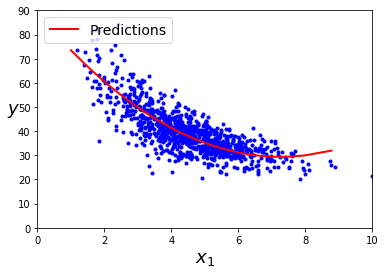

In [ ]:
order = np.argsort(X_test.values.ravel()) 
sortedXPoly = X_test.values.ravel()[order] 
sortedYPoly = y_test.values.ravel()[order]
sorted_predicPoly = y_con_regresion_poly[order]


plt.plot(X, y, "b.")
plt.plot(sortedXPoly, sorted_predicPoly, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 90]);

In [ ]:
print('El modelo con coeficientes es: Y =', regre_lineal_poly.coef_[1],'X^2 +', regre_lineal_poly.coef_[0],'X +',regre_lineal_poly.intercept_)
mae_reg_multiple = metrics.mean_absolute_error(y_test,y_con_regresion_poly)
val_mae.append(mae_reg_multiple) 
r2_regresion_lineal_multiple = r2_score(y_test,y_con_regresion_poly)
val_r2.append(r2_regresion_lineal_multiple)
metrica_mae = metrics.mean_absolute_error(y_test, y_con_regresion_poly)
r2Score = r2_score(y_test, y_con_regresion_poly)
print('Mean Average Error (MAE):', metrica_mae)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_con_regresion_poly)))
print('R^2 score',r2Score)

El modelo con coeficientes es: Y = 1.1222005144772753 X^2 + -16.310706562434078 X + 88.6430234056414
Mean Average Error (MAE): 4.31223424930749
Root Mean Squared Error: 5.778833048851248
R^2 score 0.7097897110152587


* Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.


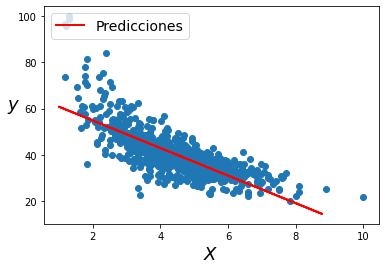

In [ ]:
mi_ridge = Ridge(alpha=5.0,fit_intercept=True) 
mi_ridge.fit(X_train, y_train)
X_val_ridge = X_test  
y_val_ridge = mi_ridge.predict(X_val_ridge)
plt.scatter(X_train, y_train)
plt.plot(X_val_ridge, y_val_ridge, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [ ]:
mae_ridge = metrics.mean_absolute_error(y_test,y_val_ridge)
val_mae.append(mae_ridge)  
r2_ridge= r2_score(y_test,y_val_ridge)
val_r2.append(r2_ridge)

metrica_mae_ridge = metrics.mean_absolute_error(y_test, y_val_ridge)
r2Score = r2_score(y_test, y_val_ridge)
print('El valor de Ridge es:')
print('Mean Average Error (MAE):', metrica_mae_ridge)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_val_ridge)))
print('R^2 score',r2Score)
print('El modelo con coeficientes es: Y =', mi_ridge.coef_,'X +', mi_ridge.intercept_)

El valor de Ridge es:
Mean Average Error (MAE): 4.848960238465538
Root Mean Squared Error: 6.737377332113401
R^2 score 0.6055297529631285
El modelo con coeficientes es: Y = [-5.96548298] X + 66.78877749985897


Modelo Lasso:


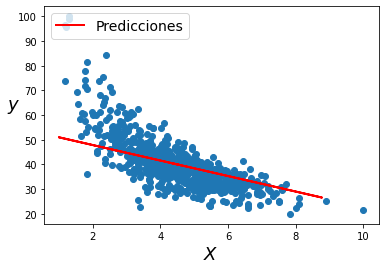

In [ ]:
print('Modelo Lasso:')
val_lasso = Lasso(alpha=5.0,fit_intercept=True) 
val_lasso.fit(X_train, y_train)
X_para_lasso = X_test  
y_para_lasso = val_lasso.predict(X_val_ridge)
plt.scatter(X_train, y_train)
plt.plot(X_para_lasso, y_para_lasso, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [ ]:
print('Métricas de Lasso')
mae_lasso = metrics.mean_absolute_error(y_test,y_para_lasso)
val_mae.append(mae_lasso) 
r2_lasso= r2_score(y_test,y_para_lasso)
val_r2.append(r2_lasso)
metrica_mae_lasso = metrics.mean_absolute_error(y_test, y_para_lasso)
r2Score = r2_score(y_test, y_para_lasso)
print('Mean Average Error (MAE):', metrica_mae_lasso)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_para_lasso)))
print('R^2 score',r2Score)
print('El modelo con coeficientes es: Y =', val_lasso.coef_,'X +', val_lasso.intercept_)

Métricas de Lasso
Mean Average Error (MAE): 5.573093589854566
Root Mean Squared Error: 7.872955766074521
R^2 score 0.46134817854269095
El modelo con coeficientes es: Y = [-3.13627861] X + 54.142095590680086


3. Finalmente grafica :
* MAE (de los cuatro métodos)
* R2 (de los cuatro métodos)


MAE : [4.848701594938563, 4.31223424930749, 4.848960238465538, 5.573093589854566]
R^2: [0.6056489925064351, 0.7097897110152587, 0.6055297529631285, 0.46134817854269095]


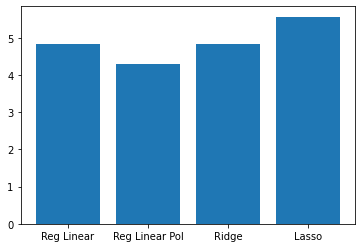

In [ ]:
print('MAE :',val_mae)
print('R^2:',val_r2)
Modelos=list()
Modelos.append('Reg Linear')
Modelos.append('Reg Linear Pol')
Modelos.append('Ridge')
Modelos.append('Lasso')

plt.bar(Modelos, val_mae)
plt.show()

Gráficos con R^2


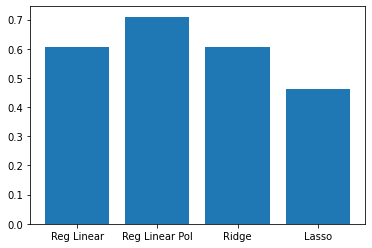

In [ ]:
print('Gráficos con R^2')
nombres=list()
nombres.append('Reg Linear')
nombres.append('Reg Linear Pol')
nombres.append('Ridge')
nombres.append('Lasso')
plt.bar(nombres, val_r2)
plt.show()

4. Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

El método que más conviene es el de Regresión Lineal Polinomial.
Utilicé el 70% de entrenamiento y 30% de evaluación.
Mi error MAE es 4.31 y la R^2 de 0.7. Por lo que al tener el error más bajo que los otros y el valor de R alto, considero que es un buen modelo.

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20773,7304301231,20140617T000000,345000.0,3,2.50,1680,2229,2.0,0,0,...,7,1680,0,2007,0,98155,47.7484,-122.322,1230,9300
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21529,2487200490,20140623T000000,670000.0,3,2.50,3310,5300,2.0,0,2,...,8,2440,870,2008,0,98136,47.5178,-122.389,2140,7500
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19948,293070090,20140711T000000,859990.0,4,2.75,3520,5500,2.0,0,0,...,9,3520,0,2014,0,98074,47.6181,-122.056,3340,5500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


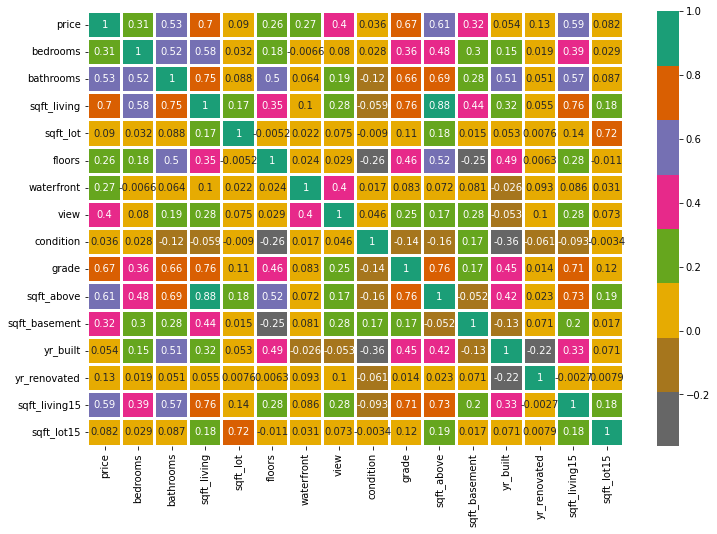

In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [ ]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


# **Ejercicio 2. Regresión múltiple.**

Encuentra el mejor regresor para los datos de las casas:

1. Divide los datos. Utiliza la función train_test_split (ya esta en el notebook).


**Regresión Múltiple Lineal.**
* Realiza la regresión lineal: modelo generado (ecuación), sus errores y r cuadrada.



In [ ]:
val_mae_2 =[] 
val_r2_2 =[]

In [ ]:
mlinear_reg = Pipeline([("scaler", StandardScaler()),
                        ("linear_reg", LinearRegression(fit_intercept=True))])
mlinear_reg.fit(X_train, y_train)
y_pred = mlinear_reg.predict(X_test)

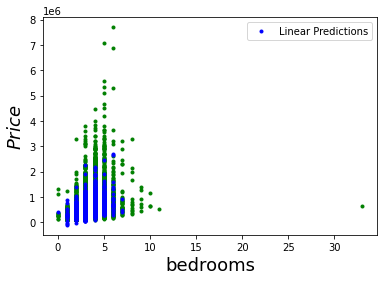

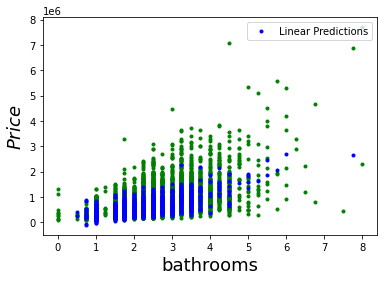

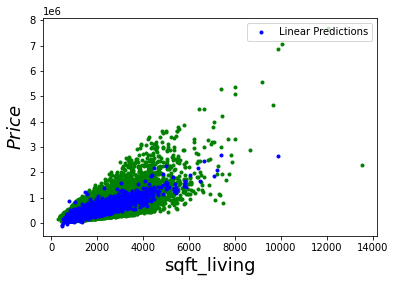

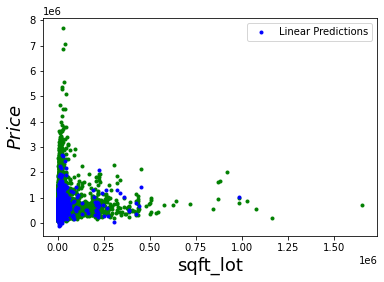

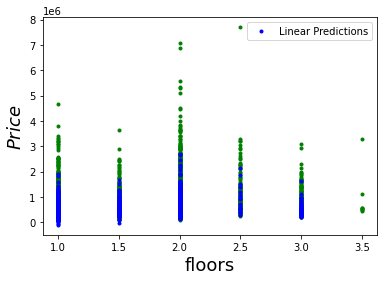

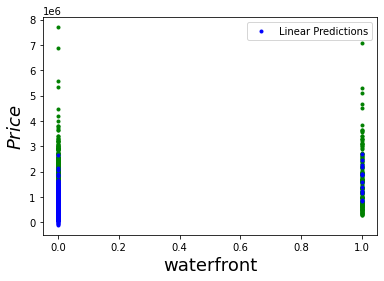

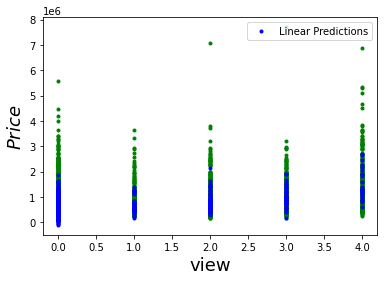

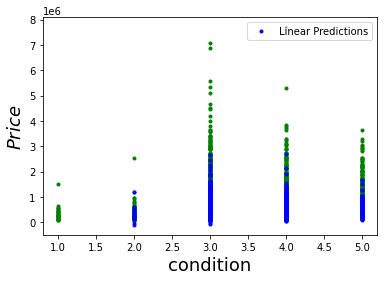

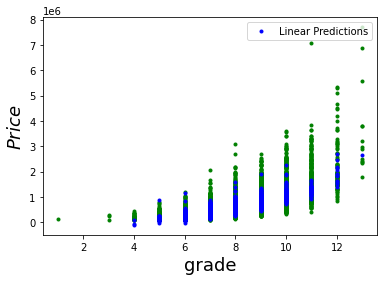

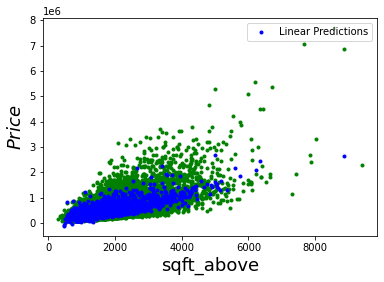

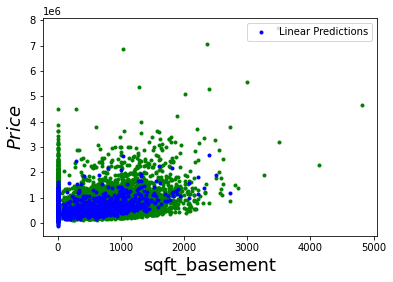

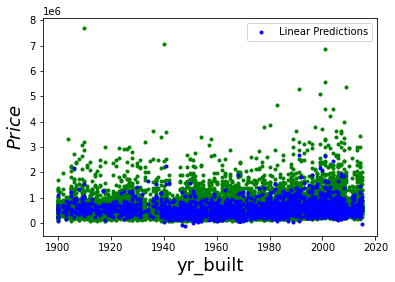

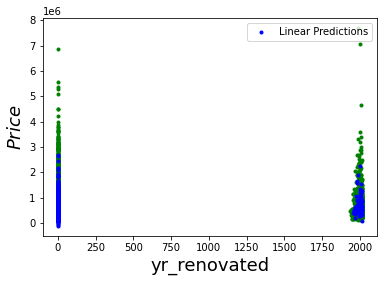

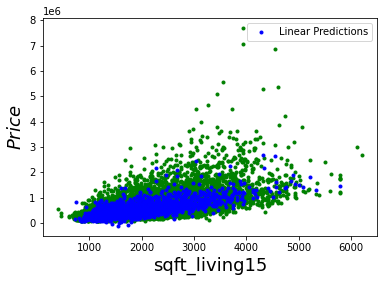

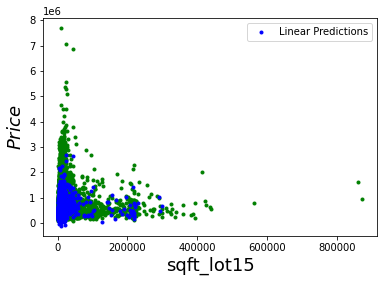

In [ ]:
for column in X.columns:
  plt.plot(X[column], y, "g.")
  plt.plot(X_test[column], y_pred, "b.", linewidth=2, label="Linear Predictions")
  plt.xlabel(column, fontsize=18)
  plt.ylabel("$Price$", rotation=90, fontsize=18)
  plt.legend(loc="upper right", fontsize=10);
  plt.show()

In [ ]:
print('Mean Average Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 score',r2_score(y_test, y_pred))
val_mae_2.append(metrics.mean_absolute_error(y_test, y_pred)) 
val_r2_2.append(r2_score(y_test, y_pred))

Mean Average Error (MAE): 137480.1388273265
Root Mean Squared Error (RMSE): 232133.367624069
R^2 score 0.6579723205007987


**Regresión Múltiple Polinomial.**
* Realiza la regresión polinomial completa, tu modelo generado (ecuación), sus errores y r cuadrada.




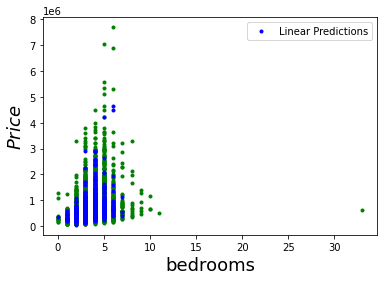

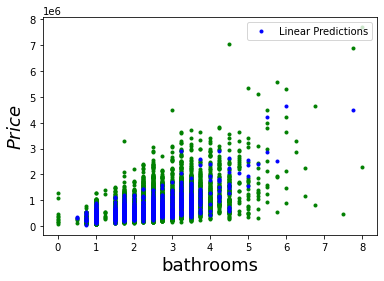

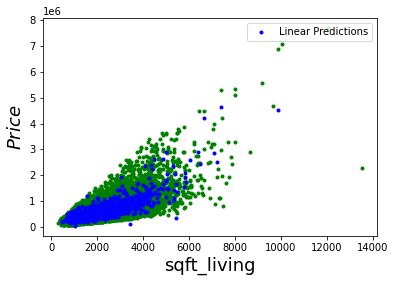

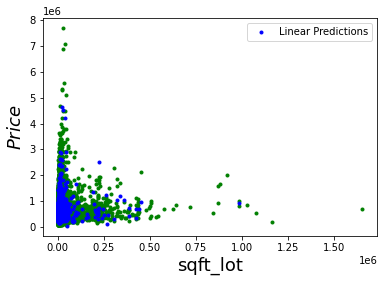

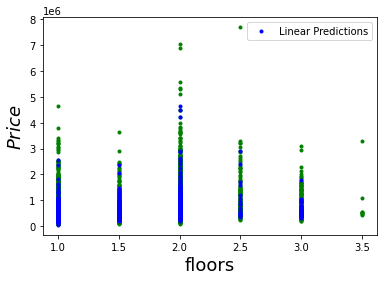

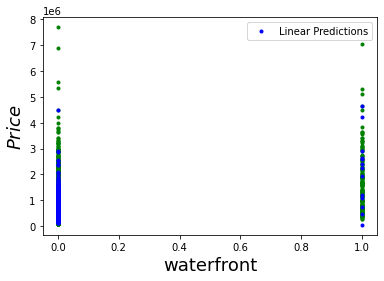

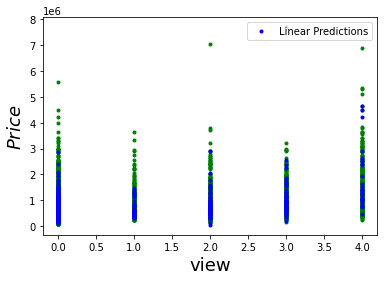

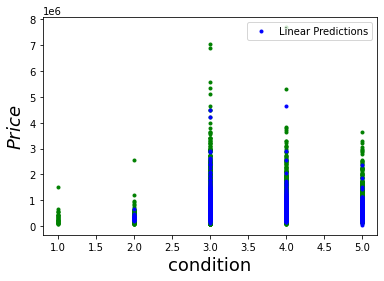

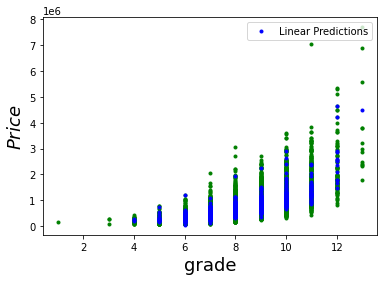

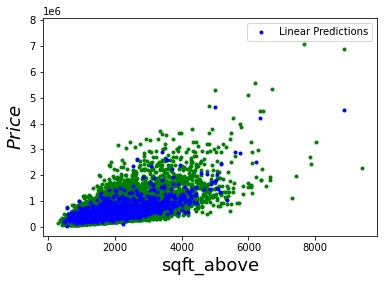

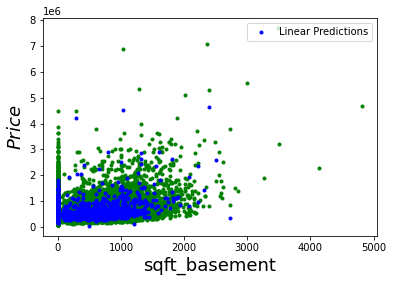

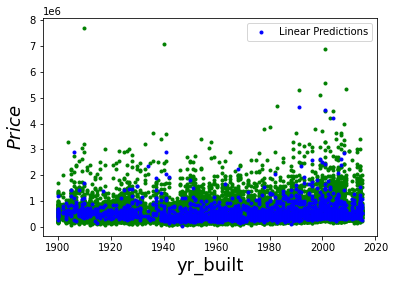

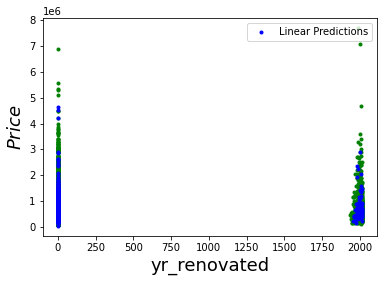

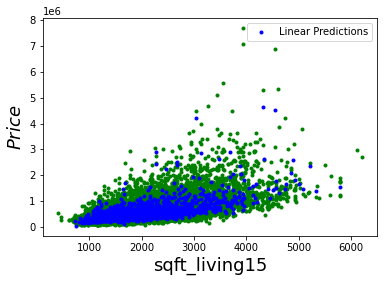

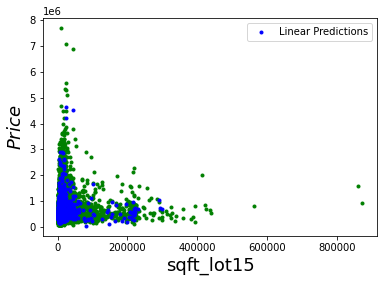

In [ ]:
mpolReg = Pipeline([("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("linear_reg", LinearRegression())])
mpolReg.fit(X_train, y_train)
y_pred = mpolReg.predict(X_test)
for column in X.columns:
  plt.plot(X[column], y, "g.")
  plt.plot(X_test[column], y_pred, "b.", linewidth=2, label="Linear Predictions")
  plt.xlabel(column, fontsize=18)
  plt.ylabel("$Price$", rotation=90, fontsize=18)
  plt.legend(loc="upper right", fontsize=10);
  plt.show()

In [ ]:
print('Medium Average Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 score',r2_score(y_test, y_pred))
val_mae_2.append(metrics.mean_absolute_error(y_test, y_pred)) 
val_r2_2.append(r2_score(y_test, y_pred))

Medium Average Error (MAE): 121306.3696141217
Root Mean Squared Error (RMSE): 186268.32390449542
R^2 score 0.7797762652531899


* Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, errores y r cuadrada.

In [ ]:
m_poly_lasso = Pipeline([("poly_features", PolynomialFeatures(degree=4, include_bias=False)),
                          ("scaler", StandardScaler()),
                          ("lasso", Lasso(alpha = 1))])
m_poly_lasso.fit(X_train, y_train)
y_pred_m_l = m_poly_lasso.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.644e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso


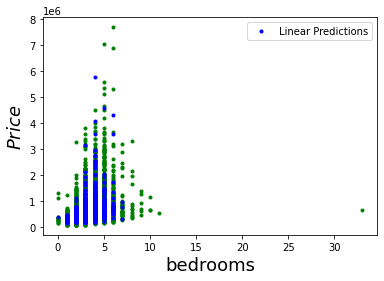

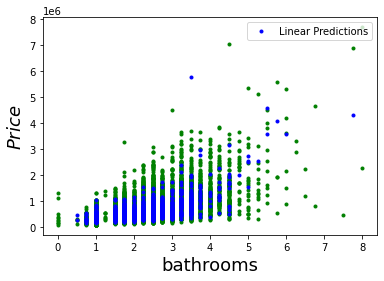

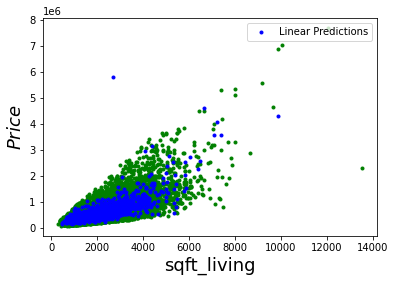

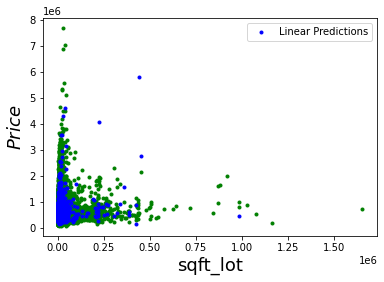

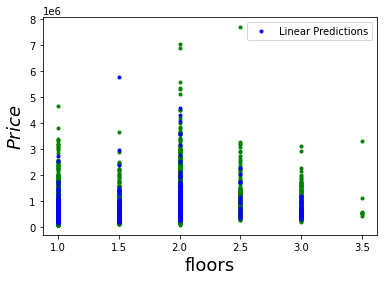

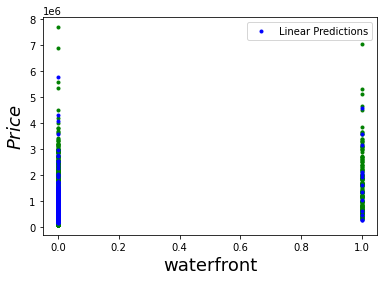

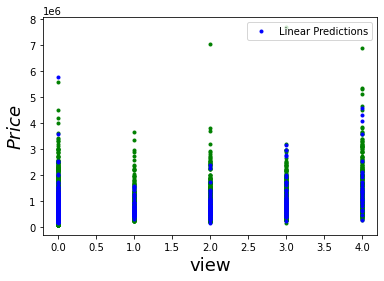

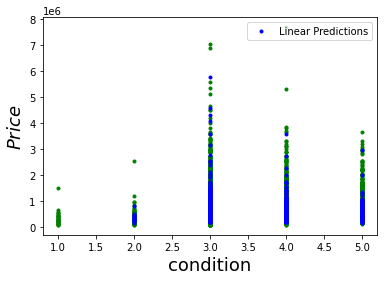

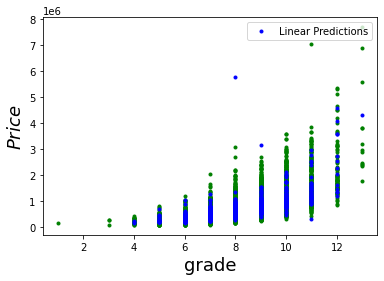

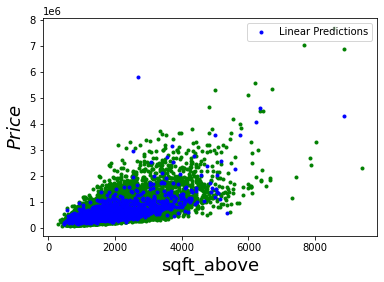

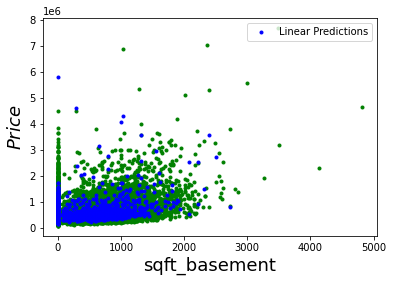

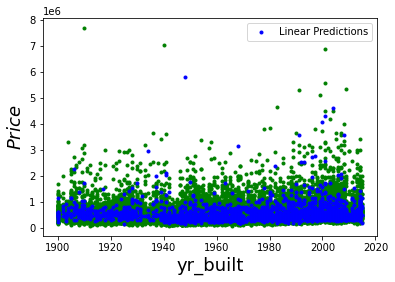

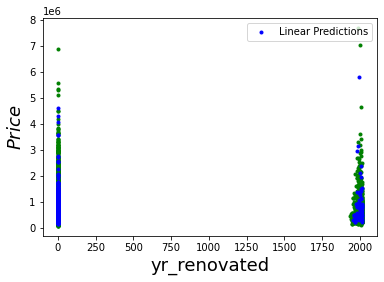

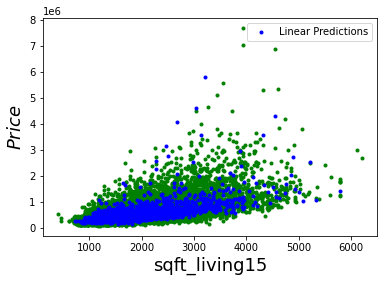

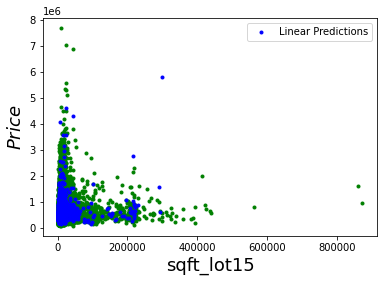

In [ ]:
print('Lasso')
for column in X.columns:
  plt.plot(X[column], y, "g.")
  plt.plot(X_test[column], y_pred_m_l, "b.", linewidth=2, label="Linear Predictions")
  plt.xlabel(column, fontsize=18)
  plt.ylabel("$Price$", rotation=90, fontsize=18)
  plt.legend(loc="upper right", fontsize=10);
  plt.show()

In [ ]:
print('Mean Average Error (MAE):', metrics.mean_absolute_error(y_test, np.ravel(y_pred_m_l)))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, np.ravel(y_pred_m_l))))
print('R^2 score',r2_score(y_test, np.ravel(y_pred_m_l)))
val_mae_2.append(metrics.mean_absolute_error(y_test, np.ravel(y_pred_m_l))) 
val_r2_2.append(r2_score(y_test, np.ravel(y_pred_m_l)))

Mean Average Error (MAE): 124443.55104614029
Root Mean Squared Error (RMSE): 234239.67541196695
R^2 score 0.6517372497860168


In [ ]:
m_poly_ridge = Pipeline([("poly_features", PolynomialFeatures(degree=4, include_bias=False)),
                         ("scaler", StandardScaler()),
                         ("lasso", Ridge(alpha = 0.8, solver = 'cholesky'))])

In [ ]:
m_poly_ridge.fit(X_train, y_train)
y_pred_m_r = m_poly_ridge.predict(X_test)

Ridge


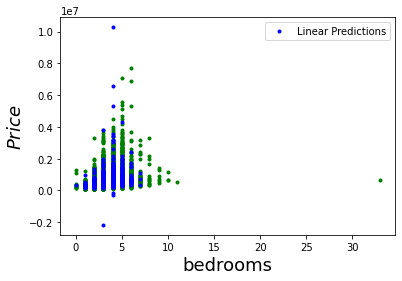

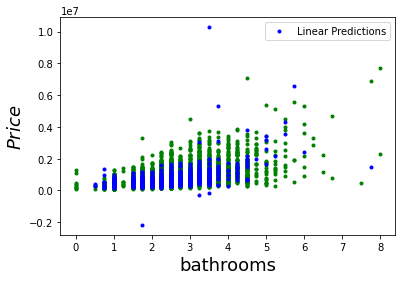

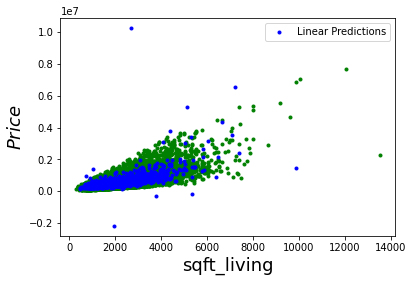

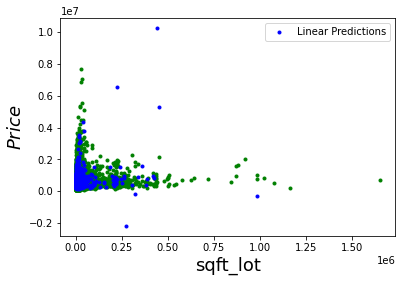

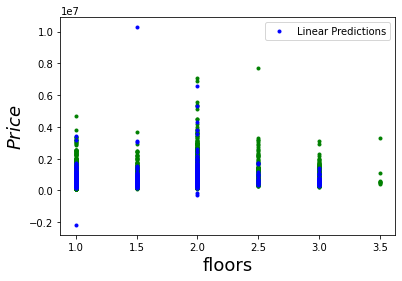

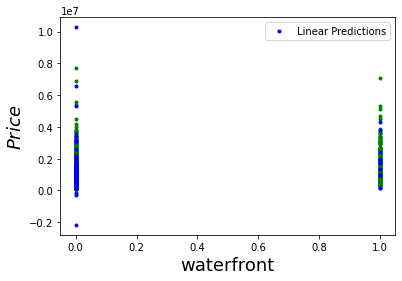

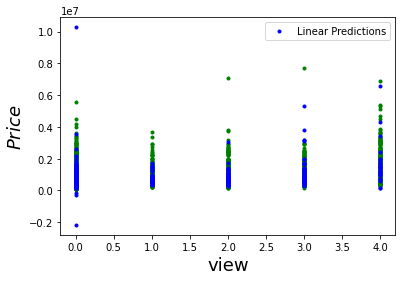

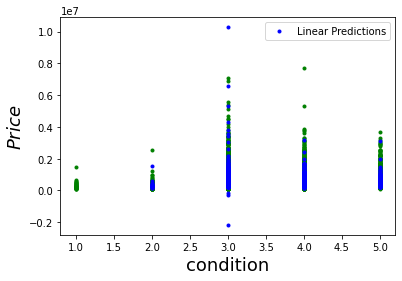

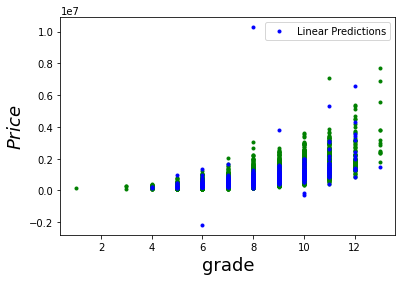

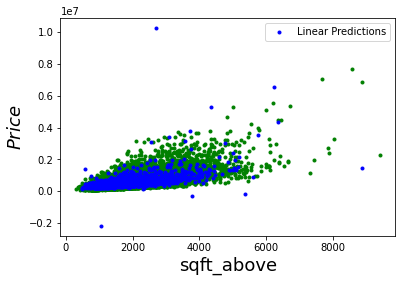

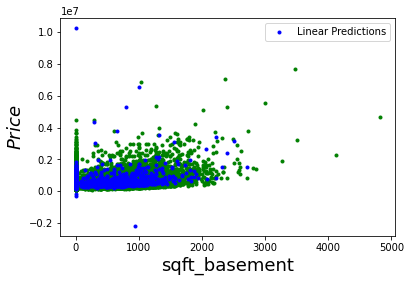

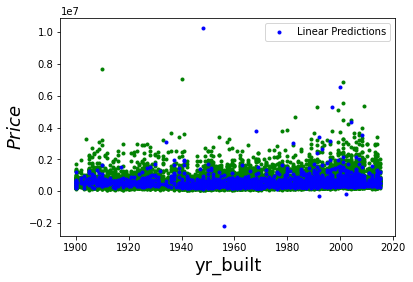

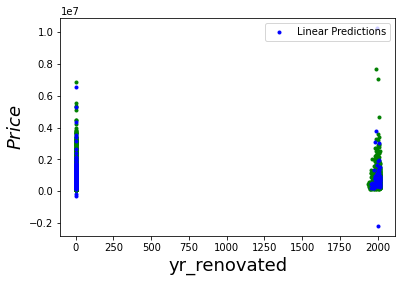

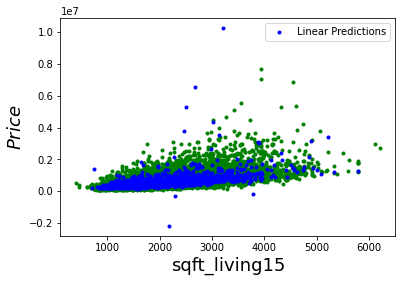

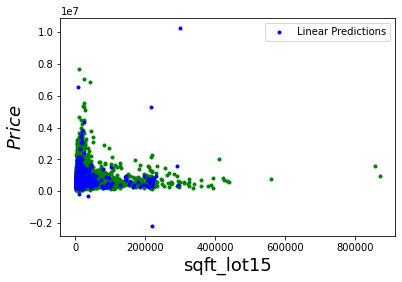

In [ ]:
print('Ridge')

for column in X.columns:
  plt.plot(X[column], y, "g.")
  plt.plot(X_test[column], y_pred_m_r, "b.", linewidth=2, label="Linear Predictions")
  plt.xlabel(column, fontsize=18)
  plt.ylabel("$Price$", rotation=90, fontsize=18)
  plt.legend(loc="upper right", fontsize=10);
  plt.show()

In [ ]:
print('Mean Average Error (MAE):', metrics.mean_absolute_error(y_test, np.ravel(y_pred_m_r)))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, np.ravel(y_pred_m_r))))
print('R^2 score',r2_score(y_test, np.ravel(y_pred_m_r)))
val_mae_2.append(metrics.mean_absolute_error(y_test, np.ravel(y_pred_m_r))) 
val_r2_2.append(r2_score(y_test, np.ravel(y_pred_m_r)))

Mean Average Error (MAE): 135594.6810364113
Root Mean Squared Error (RMSE): 348675.5117936135
R^2 score 0.22833464177981322


2. **Finalmente gráfica :**

* MAE (de los cuatro métodos)
* R^2 (de los cuatro métodos)

MAE : [137480.1388273265, 121306.3696141217, 124443.55104614029, 135594.6810364113]
R^2: [0.6579723205007987, 0.7797762652531899, 0.6517372497860168, 0.22833464177981322]


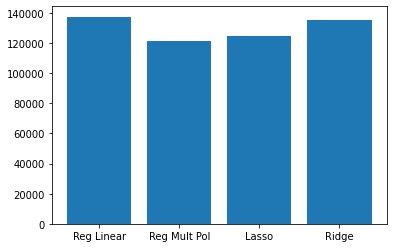

In [ ]:
print('MAE :',val_mae_2)
print('R^2:',val_r2_2)
Modelos_2=list()
Modelos_2.append('Reg Linear')
Modelos_2.append('Reg Mult Pol')
Modelos_2.append('Lasso')
Modelos_2.append('Ridge')

plt.bar(Modelos_2, val_mae_2)
plt.show()

Gráficos con R^2


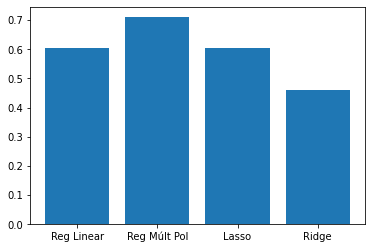

In [ ]:
print('Gráficos con R^2')
nombres_2=list()
nombres_2.append('Reg Linear')
nombres_2.append('Reg Múlt Pol')
nombres_2.append('Lasso')
nombres_2.append('Ridge')
plt.bar(nombres_2, val_r2)
plt.show()



Explica tus resultados, que método se aproxima mejor, ¿por qué?, ¿qué porcentajes de entrenamiento y evaluación usaste? ¿Que error tienes?, ¿es bueno?, ¿Cómo lo sabes?
Agrega las conclusiones

Al analizar los resultados numéricos y gráficos de los score R^2 y MAE, se puede concluir que el modelo plinomial obtuvo mejores resultados. el porcentaje de entranamiento fue 90% y evaluación 10%.
